### Digital Signal Processing 2024.2

#### Group Members:
- 202206840015 - GIOVANA NASCIMENTO DA SILVA
- 202106840029 - RYAN CARLOS REIS DE OLIVEIRA
- 202106840017 - VALDINEI RODRIGUES DA CONCEICAO

### Data Description
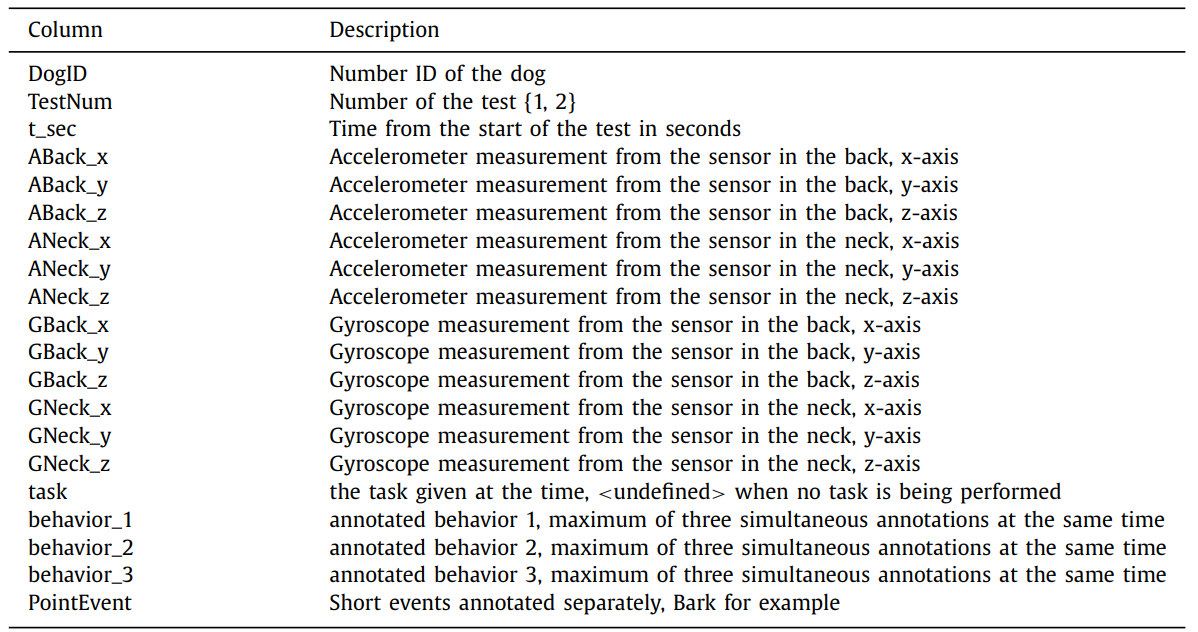

In [1]:
# Uncomment to run on Colab

# !wget https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/4bf09458-e5a6-4e40-b1f2-37399a771865 -O dog_data.zip
# !unzip dog_data.zip

##### Import libraries and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn import tree
import sklearn.metrics as metrics
from datetime import datetime
import os

dogData = pd.read_csv('./DogMoveData.csv')
dogData

,DogID,TestNum,t_sec,ABack_x,ABack_y,ABack_z,ANeck_x,ANeck_y,ANeck_z,GBack_x,GBack_y,GBack_z,GNeck_x,GNeck_y,GNeck_z,Task,Behavior_1,Behavior_2,Behavior_3,PointEvent
0,16,1,0.00,0.041504,0.938965,-0.015137,-0.067871,-0.510254,-0.934570,-17.639161,-22.766115,7.446290,-7.934571,6.347657,13.427735,<undefined>,<undefined>,<undefined>,<undefined>,<undefined>
1,16,1,0.01,0.041992,0.941895,-0.020020,-0.128906,-0.494141,-0.913086,-15.075685,-11.413575,4.821778,-3.906250,4.394532,16.540528,<undefined>,Synchronization,<undefined>,<undefined>,<undefined>
2,16,1,0.02,0.040527,0.939453,-0.004395,-0.158691,-0.480469,-0.911133,-12.207032,-0.122070,2.807617,-0.488281,-1.953125,26.794435,<undefined>,Synchronization,<undefined>,<undefined>,<undefined>
3,16,1,0.03,0.021484,0.946289,0.007813,-0.122070,-0.486816,-0.880371,-9.460450,7.995606,1.586914,1.159668,-5.676270,38.085940,<undefined>,Synchronization,<undefined>,<undefined>,<undefined>
4,16,1,0.04,-0.000977,0.951172,0.033691,-0.053711,-0.500000,-0.807129,-8.361817,14.587403,-1.037598,4.577637,4.089356,41.503909,<undefined>,Synchronization,<undefined>,<undefined>,<undefined>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10611063,74,2,1928.19,0.018066,0.436523,0.808105,-0.620605,0.326172,-0.647949,23.620607,75.317387,77.148442,-124.511726,107.727057,-122.497566,Task treat-search,Sniffing,<undefined>,<undefined>,<undefined>
10611064,74,2,1928.20,-0.021973,0.515625,0.813965,-0.671875,0.241211,-0.660645,34.729006,63.293461,79.956060,-116.455085,97.534186,-123.229988,Task treat-search,Sniffing,<undefined>,<undefined>,<undefined>
10611065,74,2,1928.21,-0.041504,0.507324,0.782227,-0.674805,0.244629,-0.627930,39.978030,49.316409,84.655767,-104.858405,95.458990,-124.816902,Task treat-search,Sniffing,<undefined>,<undefined>,<undefined>
10611066,74,2,1928.22,-0.032715,0.484375,0.824219,-0.685059,0.211426,-0.578613,38.024905,32.775881,89.538580,-87.463384,101.257330,-128.601082,Task treat-search,Sniffing,<undefined>,<undefined>,<undefined>


##### Plot dog counting bar graph (useless)

In [3]:
# dogData.value_counts('DogID').sort_index().plot(kind='bar', grid=False, ylabel='Frequency', xlabel='Dog ID', figsize=(16, 5))

In [4]:
# dogData.describe()

### Euclidean Norm

##### XYZ to ndarrays

In [5]:
AccNeck = dogData[['ANeck_x', 'ANeck_y', 'ANeck_z']].to_numpy()
normAccNeck = np.linalg.norm(AccNeck, axis=1)

GyrNeck = dogData[['GNeck_x', 'GNeck_y', 'GNeck_z']].to_numpy()
normGyrNeck = np.linalg.norm(GyrNeck, axis=1)

In [6]:
print(f'Euclidean Norm AccNeck\n     min: {np.min(normAccNeck)}, max: {np.max(normAccNeck)}, mean: {np.mean(normAccNeck)}')
print(f'Euclidean Norm GyrNeck\n     min: {np.min(normGyrNeck)}, max: {np.max(normGyrNeck)}, mean: {np.mean(normGyrNeck)}')

Euclidean Norm AccNeck
     min: 0.003009856308862601, max: 27.712249430103792, mean: 1.1258829306749116
Euclidean Norm GyrNeck
     min: 0.0, max: 2835.2634351299926, mean: 79.92119281685349


##### Plot euclideans

Text(0.5, 1.0, 'Gyroscope Neck [40000:45000]')

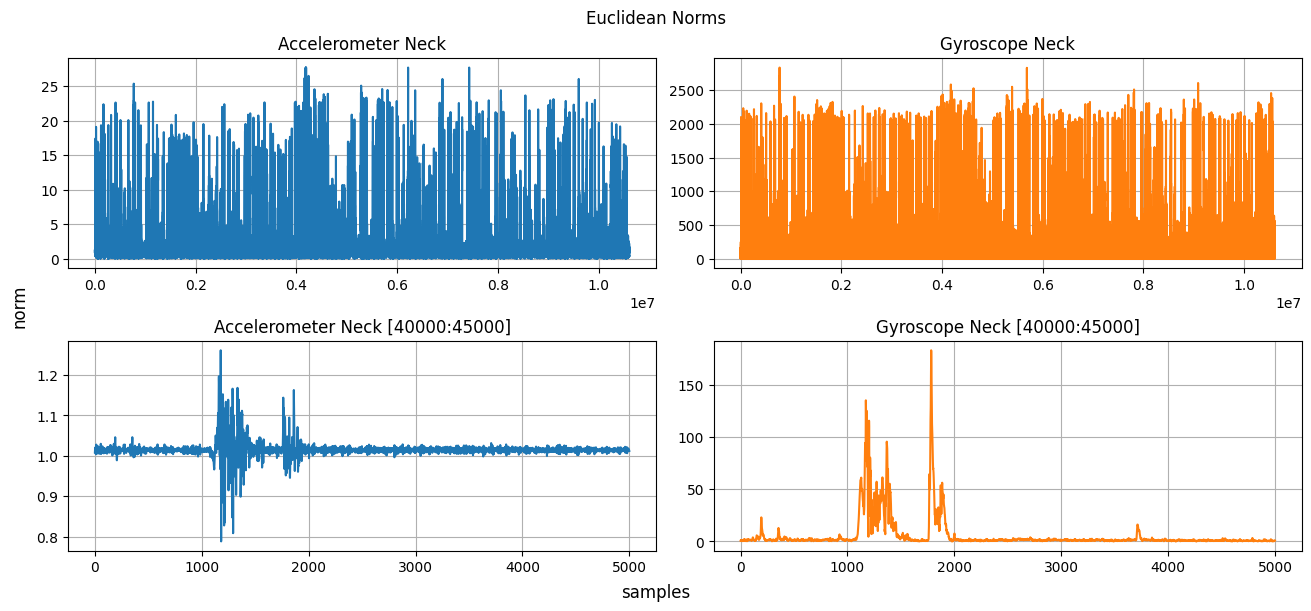

In [7]:
plt.rcParams['axes.grid'] = True
fig, axs = plt.subplots(2, 2, figsize=(13, 6), constrained_layout=True)
fig.suptitle('Euclidean Norms')
fig.supxlabel('samples')
fig.supylabel('norm')

axs[0, 0].plot(normAccNeck[:])
axs[0, 0].set_title('Accelerometer Neck')

axs[0, 1].plot(normGyrNeck[:], color='#ff7f0e')
axs[0, 1].set_title('Gyroscope Neck')

window_start, window_width = 40000, 5000

axs[1, 0].plot(normAccNeck[window_start:window_start+window_width], label='AccNeck')
axs[1, 0].set_title(f'Accelerometer Neck [{window_start}:{window_start+window_width}]')

axs[1, 1].plot(normGyrNeck[window_start:window_start+window_width], label='GyrNeck', color='#ff7f0e')
axs[1, 1].set_title(f'Gyroscope Neck [{window_start}:{window_start+window_width}]')

### Separating dogs and filtering dataframe

In [8]:
# Drop useless columns
dogData.drop(list(dogData.filter(regex = '\w+_(x|y|z)')), axis = 1, inplace = True)
dogData.drop(['t_sec', 'Task', 'TestNum', 'PointEvent'], axis = 1, inplace = True)

# Add euclidean norms to df
dogData['normAccNeck'] = normAccNeck
dogData['normGyrNeck'] = normGyrNeck

# These will be updated later
dogData['filteredAccNeck'] = normAccNeck
dogData['filteredGyrNeck'] = normGyrNeck
dogData['hannAccNeck'] = normAccNeck
dogData['hannGyrNeck'] = normGyrNeck
dogData['behavior'] = dogData['Behavior_1'] 

dogData = [dog for x, dog in dogData.groupby('DogID', as_index=False)] # Separating each dog in it's own df
dogData[0]

,DogID,Behavior_1,Behavior_2,Behavior_3,normAccNeck,normGyrNeck,filteredAccNeck,filteredGyrNeck,hannAccNeck,hannGyrNeck,behavior
0,16,<undefined>,<undefined>,<undefined>,1.066952,16.839069,1.066952,16.839069,1.066952,16.839069,<undefined>
1,16,Synchronization,<undefined>,<undefined>,1.046192,17.554480,1.046192,17.554480,1.046192,17.554480,Synchronization
2,16,Synchronization,<undefined>,<undefined>,1.042208,26.869962,1.042208,26.869962,1.042208,26.869962,Synchronization
3,16,Synchronization,<undefined>,<undefined>,1.013382,38.524066,1.013382,38.524066,1.013382,38.524066,Synchronization
4,16,Synchronization,<undefined>,<undefined>,0.950969,41.955358,0.950969,41.955358,0.950969,41.955358,Synchronization
...,...,...,...,...,...,...,...,...,...,...,...
320871,16,Sniffing,<undefined>,<undefined>,0.809918,129.311050,0.809918,129.311050,0.809918,129.311050,Sniffing
320872,16,Sniffing,<undefined>,<undefined>,0.844725,147.616332,0.844725,147.616332,0.844725,147.616332,Sniffing
320873,16,Sniffing,<undefined>,<undefined>,0.920137,160.884074,0.920137,160.884074,0.920137,160.884074,Sniffing
320874,16,Sniffing,<undefined>,<undefined>,0.972088,173.707803,0.972088,173.707803,0.972088,173.707803,Sniffing


### Filtering

Set filters params:

In [10]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ellip.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html

# ----------------- ----------------- -----------------
fs = 100 # signal sampling rate (Hz)
filters_order = 2

# ----------------- Elliptic filter params -----------------
cutoff = 0.5 # Hz
rp = 1  # Maximum ripple (dB)
rs = 40  # Minimum attenuation required in the stop band (dB)
normalized_cutoff = (2 * cutoff) / fs # cutoff / nyquist (Hz)

sos_ellip = signal.ellip(filters_order, rp, rs, normalized_cutoff, 'hp', output='sos')

# ----------------- Butterworth filter params -----------------
cutoff = 10 # Hz
normalized_cutoff = (2 * cutoff) / fs # cutoff / nyquist (Hz)

sos_butter = signal.butter(filters_order, normalized_cutoff, 'lp', output='sos')

print(signal.sos2zpk(sos_butter))
# ----------------- ----------------- -----------------

def apply_filters(window):
    filtered_ellip = signal.sosfilt(sos_ellip, window)
    filtered_both = signal.sosfilt(sos_butter, filtered_ellip)

    return filtered_both

def plot_freq_resp(sos, fs, name):
    w, h = signal.sosfreqz(sos, fs=fs, worN=1024)
    h_mag = 20 * np.log10(abs(h))
    h_phase = np.angle(h)

    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 3), constrained_layout=True)
    fig.suptitle(f'{name} frequency response')

    ax0.plot(w, h_mag)
    ax0.set_xlabel('Frequency (Hz)')
    ax0.set_ylabel('Gain (dB)')

    ax1.plot(w, h_phase)
    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel('Phase (rad)')
    ax1.set_yticks([-np.pi, -0.5*np.pi, 0, 0.5*np.pi, np.pi],
           [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])

def plot_poles_zeros(sos, name):
    z, p, k = signal.sos2zpk(sos)

    plt.figure(figsize=(6, 6))
    plt.title(f'{name} pole/zero')

    plt.scatter(z.real, z.imag, marker='o', label='Zeros')
    plt.scatter(p.real, p.imag, marker='x', label='Poles', color='red')

    unit_circle = plt.Circle((0, 0), 1, color='red', fill=False)
    poles_circle = plt.Circle((0, 0), np.abs(p[0]), linestyle='--', fill=False)
    plt.gca().add_artist(unit_circle)
    plt.gca().add_artist(poles_circle)

    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)

    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.grid(False)
    plt.ylabel('Imag')
    plt.xlabel('Real')

    plt.gca().set_aspect('equal', adjustable='box')
    plt.figtext(0.14, 0.15, f'Poles: {p}')
    plt.figtext(0.14, 0.12, f'Zeros: {z}')

    plt.legend()
    plt.show()

(array([-1.+0.j, -1.+0.j]), array([0.57149025+0.2935992j, 0.57149025-0.2935992j]), np.float64(0.0674552738890719))


#### Plotting frequency response

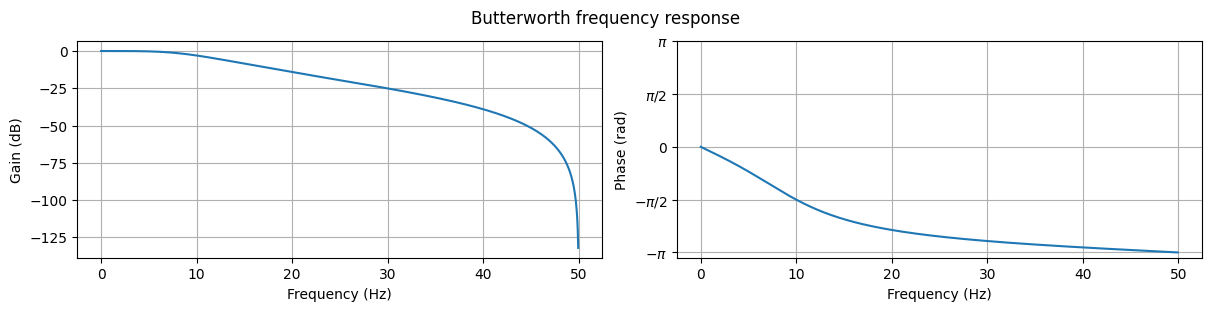

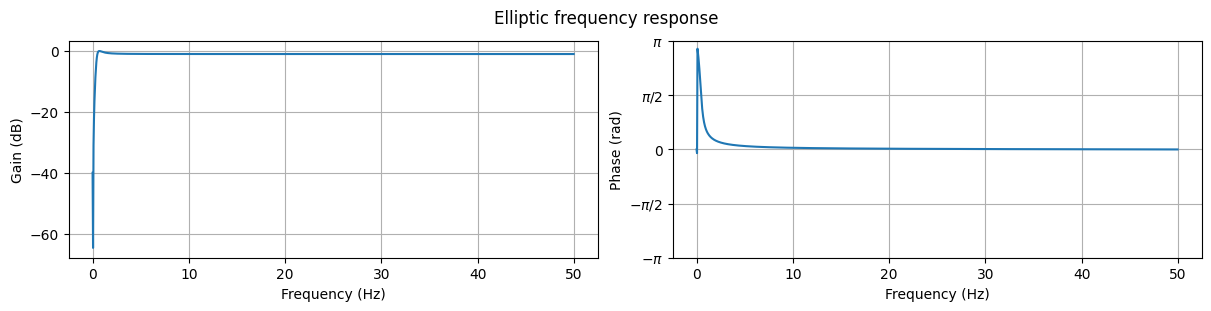

In [11]:
plot_freq_resp(sos_butter, fs, 'Butterworth')
plot_freq_resp(sos_ellip, fs, 'Elliptic')

#### Plotting poles and zeros

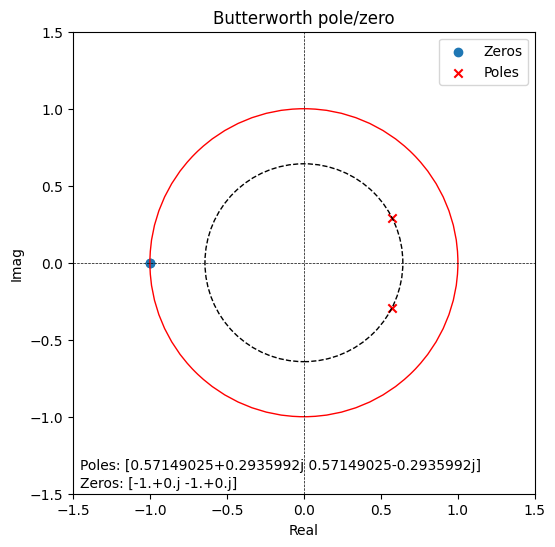

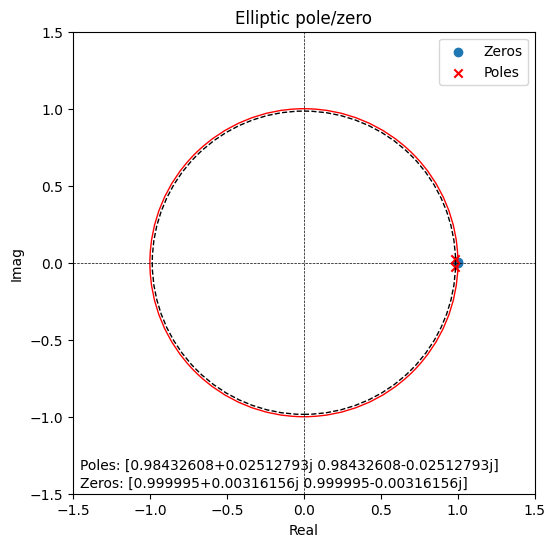

In [12]:
plot_poles_zeros(sos_butter, 'Butterworth')
plot_poles_zeros(sos_ellip, 'Elliptic')

#### Applying filters to all dogs signals

In [13]:
for dog in dogData:
    dog['filteredAccNeck'] = apply_filters(dog['normAccNeck'])
    dog['filteredGyrNeck'] = apply_filters(dog['normGyrNeck'])

(175336, 11)


Text(0.5, 1.0, 'Gyroscope [160000:160500]')

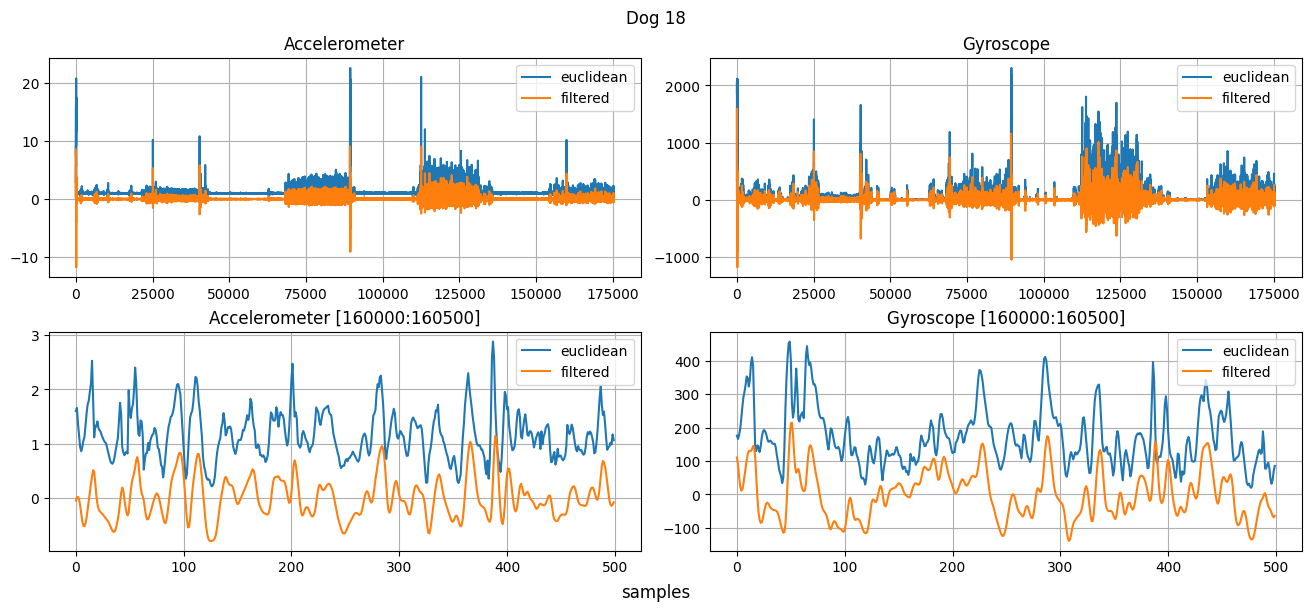

In [14]:
dog = 1
dogNumber = str(dogData[dog]['DogID'].iloc()[0])
window_start, window_width = 160000, 500

print(dogData[dog].shape)

fig, axs = plt.subplots(2, 2, figsize=(13, 6), constrained_layout=True)
fig.suptitle(f'Dog {dogNumber}')
fig.supxlabel('samples')

axs[0, 0].plot(dogData[dog]['normAccNeck'].to_numpy(), label='euclidean')
axs[0, 0].plot(dogData[dog]['filteredAccNeck'].to_numpy(), label='filtered')
axs[0, 0].legend()
axs[0, 0].set_title('Accelerometer')

axs[0, 1].plot(dogData[dog]['normGyrNeck'].to_numpy(), label='euclidean')
axs[0, 1].plot(dogData[dog]['filteredGyrNeck'].to_numpy(), label='filtered')
axs[0, 1].legend()
axs[0, 1].set_title('Gyroscope')

axs[1, 0].plot(dogData[dog]['normAccNeck'].to_numpy()[window_start:window_start+window_width], label='euclidean')
axs[1, 0].plot(dogData[dog]['filteredAccNeck'].to_numpy()[window_start:window_start+window_width], label='filtered')
axs[1, 0].legend()
axs[1, 0].set_title(f'Accelerometer [{window_start}:{window_start+window_width}]')

axs[1, 1].plot(dogData[dog]['normGyrNeck'].to_numpy()[window_start:window_start+window_width], label='euclidean')
axs[1, 1].plot(dogData[dog]['filteredGyrNeck'].to_numpy()[window_start:window_start+window_width], label='filtered')
axs[1, 1].legend()
axs[1, 1].set_title(f'Gyroscope [{window_start}:{window_start+window_width}]')

### Windowing
One sample is captured each .01 seconds, so we have a sampling rate of 100hz.

To have windows of 2s with 50% superposition we will use the **window width (M) = 200** and **step size = 100**.

In [15]:
M = 200

hann = np.hanning(M)

# Window dogs as dogWindows[dog (0~44)][window (0~n)][column (0~8)]

# Column 0: DogID
# Column 1: Behavior_1
# Column 2: Behavior_2
# Column 3: Behavior_3
# Column 4: normAccNeck
# Column 5: normGyrNeck
# Column 6: filteredAccNeck
# Column 7: filteredGyrNeck
# Column 8: hannAccNeck (to be calculated)
# Column 9: hannGyrNeck (to be calculated)
# Column 10: behavior (to be calculated)

dogWindows = [
    np.lib.stride_tricks.sliding_window_view(dogData[i], M, axis=0)[::int(M/2)].copy() # Create copy because view is read-only
    for i in range(len(dogData))
]

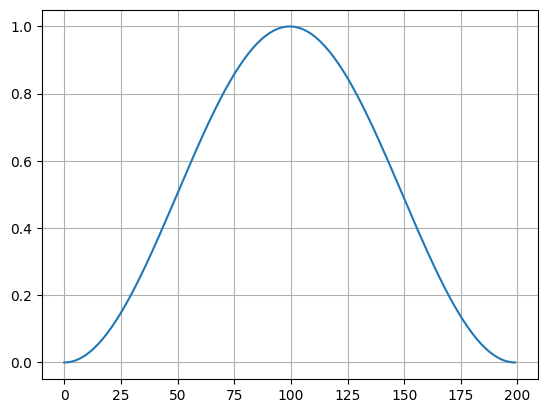

In [301]:
plt.plot(hann)

$$\textrm{number of windows} = \lfloor \frac{N - M}{S} \rfloor + 1$$
Where N is the number of samples (rows), M is the window width and S is the step size.

In [16]:
# Using the equation above we can validate the window size, at least

dog = 5
def expected_nwin (dog): return int(np.floor((len(dogData[dog]) - M) / (M/2)) + 1)

print(f'Number of windows in dog {dog}'
      f'\nExpected: {expected_nwin(dog)}'
      f'\nCurrent: {len(dogWindows[dog])}')

Number of windows in dog 5
Expected: 1603
Current: 1603


##### Defining behavior to each window

In [318]:
# --------- OLD CODE ----------
# for dog in dogWindows:
#     for window in dog:
#         window_behaviors = window[[1, 2, 3]].flatten()
#         window_behaviors = window_behaviors[window_behaviors != '<undefined>'] # undefined do not enter in the counting

#         values, counts = np.unique(window_behaviors, return_counts=True)
#         result = values[counts >= len(window_behaviors) * 0.75]

#         window[10] = result[0] if result.size > 0 else 'None'

desired = ['Galloping', 'Standing', 'Walking']

for dog in dogWindows:
    for window in dog:
        window_behaviors = ['','','']

        for i in range(3):
            values, counts = np.unique(window[i+1], return_counts=True)
            result = values[counts >= 200 * 0.75]
            if len(result) > 0:
                if result[0] != '<undefined>': 
                    window_behaviors[i] = result[0]

        # Priority to desired values
        matches = set(desired) & set(window_behaviors) # find intersection
        if len(matches) >= 1:
            window[10] = list(matches)[0] # returns the matching value from desired
        else:
            # returns first non '' behavior, if there's none, return ''
            first_behavior = next((behavior for behavior in window_behaviors if behavior != ''), '')
            window[10] = first_behavior

##### Hann Window

We will use Hann window, defined as: $$w(n)=0.5-0.5\cos\biggl({\frac{2\pi n}{M-1}}\biggr) \hspace{0.8cm} 0\leq n\leq M-1$$

In [319]:
for dog in dogWindows:
    for window in dog:
        window[8] = window[6] * hann # hannAccNeck = filteredAccNeck * hann
        window[9] = window[7] * hann # hannGyrNeck = filteredGyrNeck * hann

Text(0.5, 1.0, 'Gyroscope Window')

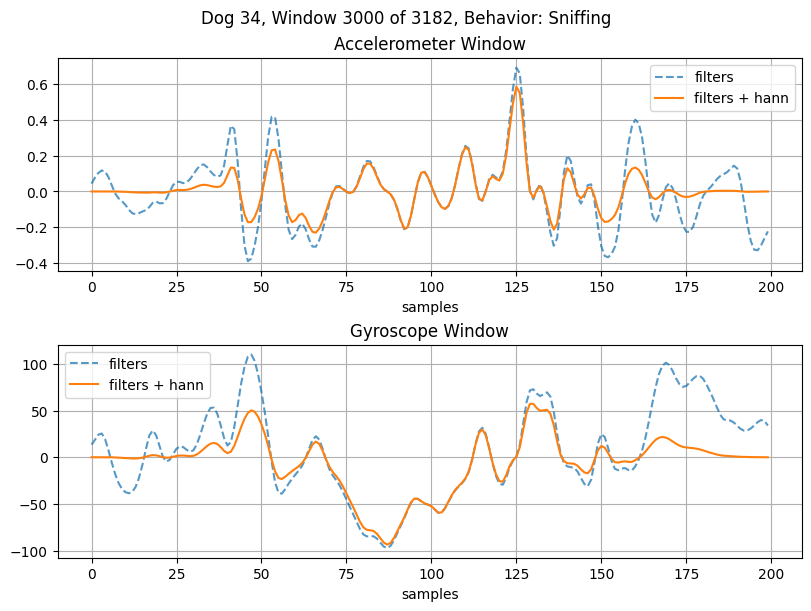

In [320]:
dog = 14
window = 3000

plt.rcParams['axes.grid'] = True
fig, (ax0, ax1) = plt.subplots(2, figsize=(8, 6), constrained_layout=True)
fig.suptitle(f'Dog {dogWindows[dog][0][0][0]}, Window {window} of {expected_nwin(dog)-1}, Behavior: {dogWindows[dog][window][10][0]}')
# fig.supxlabel('samples')
# fig.supylabel('norm')

ax0.plot(dogWindows[dog][window][6], '--', alpha=0.75, label='filters')
ax0.plot(dogWindows[dog][window][8], label='filters + hann')
ax0.legend()
ax0.set_xlabel('samples')
ax0.set_title(f'Accelerometer Window')

ax1.plot(dogWindows[dog][window][7], '--', alpha=0.75, label='filters')
ax1.plot(dogWindows[dog][window][9], label='filters + hann')
ax1.legend()
ax1.set_xlabel('samples')
ax1.set_title('Gyroscope Window')

### Getting data to train Decision Tree

In [321]:
# All dogs to one ndarray
# data[window][0 ~ 10][0 ~ 199]
data = np.concatenate(dogWindows)
data.shape

(106046, 11, 200)

In [322]:
print(f'Behaviors:')
values, counts = np.unique(data[:,10,0], return_counts=True)
print(np.column_stack((values, counts)))


Behaviors:
[['' 42452]
 ['Bowing' 2]
 ['Carrying object' 29]
 ['Drinking' 558]
 ['Eating' 400]
 ['Extra_Synchronization' 2]
 ['Galloping' 772]
 ['Jumping' 11]
 ['Lying chest' 10655]
 ['Pacing' 521]
 ['Panting' 4209]
 ['Playing' 7838]
 ['Shaking' 138]
 ['Sitting' 6617]
 ['Sniffing' 9327]
 ['Standing' 9490]
 ['Synchronization' 110]
 ['Trotting' 6394]
 ['Tugging' 107]
 ['Walking' 6414]]


['Galloping', 'Standing', 'Walking']


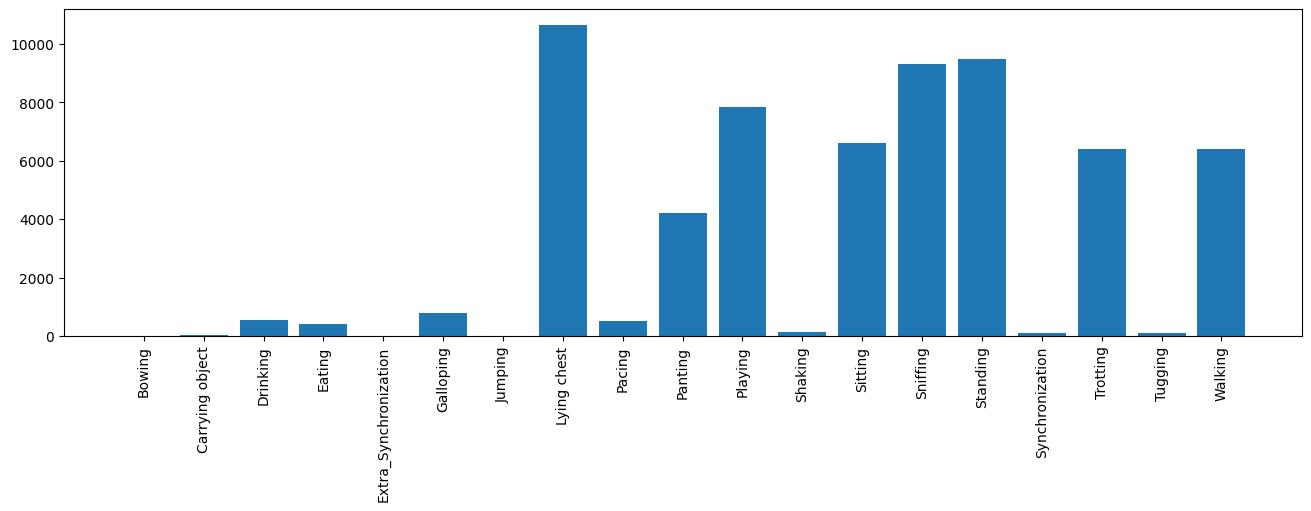

In [323]:
print(desired)

fig, ax = plt.subplots(figsize=(13, 5), constrained_layout=True)
ax.bar(values[1:], counts[1:])
ax.grid(False)
ax.tick_params(axis='x', rotation=90)

['Galloping', 'Standing', 'Walking']


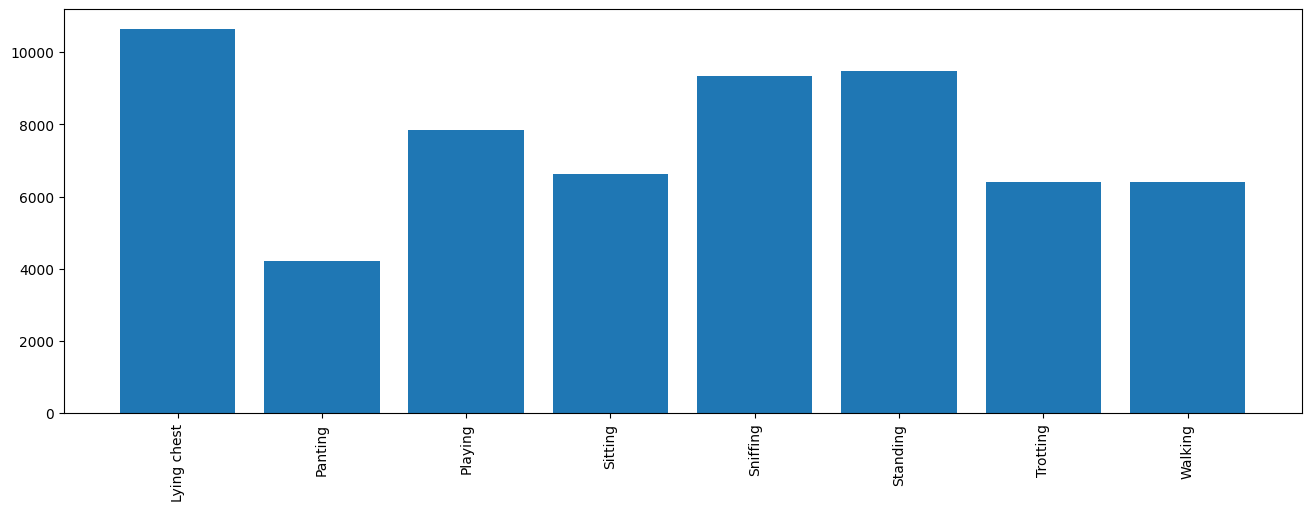

In [324]:
print(desired)

fig, ax = plt.subplots(figsize=(13, 5), constrained_layout=True)
ax.bar(values[(counts < 20000) & (counts > 1000)], counts[(counts < 20000) & (counts > 1000)])
ax.grid(False)
ax.tick_params(axis='x', rotation=90)

In [ ]:
# ----------------- OLD -----------------
# Column 0: DogID
# Column 1: Behavior_1
# Column 2: Behavior_2
# Column 3: Behavior_3
# Column 4: normAccNeck
# Column 5: normGyrNeck
# Column 6: filteredAccNeck
# Column 7: filteredGyrNeck
# Column 8: hannAccNeck
# Column 9: hannGyrNeck
# Column 10: behavior

# Filter useless columns
data = np.delete(data, [1, 2, 3, 4, 5, 6, 7], 1)
data.shape

# ----------------- NEW -----------------
# Column 0: DogID
# Column 1: hannAccNeck (windowed and filtered signal)
# Column 2: hannGyrNeck (windowed and filtered signal)
# Column 3: behavior (most frequent behavior in the window)

# ----------------- ---- -----------------
desired =  ['Galloping', 'Standing', 'Walking']

# Filter only desired behaviors:
data = data[np.isin(data[:, 3, 0], desired)]

print(f'Shape of data with only {desired} data: {data.shape}')

Shape of data with only ['Galloping', 'Standing', 'Walking'] data: (16676, 4, 200)


['Galloping' 'Standing' 'Walking']
[ 772 9490 6414]


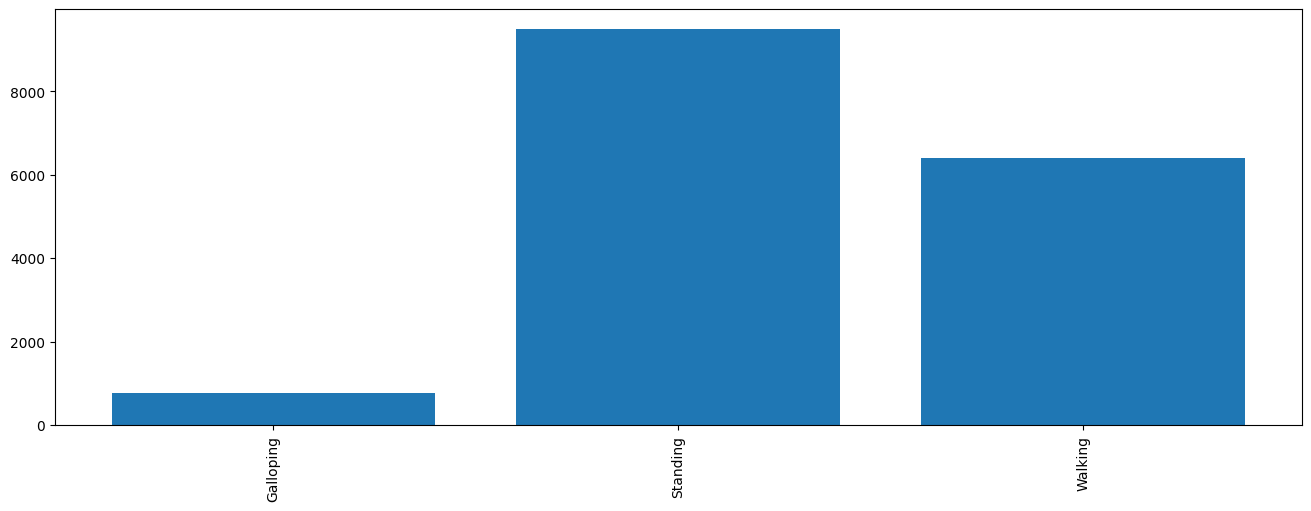

In [338]:
values, counts = np.unique(data[:, 3, 0], return_counts=True)

fig, ax = plt.subplots(figsize=(13, 5), constrained_layout=True)
ax.bar(values, counts)
ax.grid(False)
ax.tick_params(axis='x', rotation=90)

print(values)
print(counts)

#### Finding FFT peak frequency

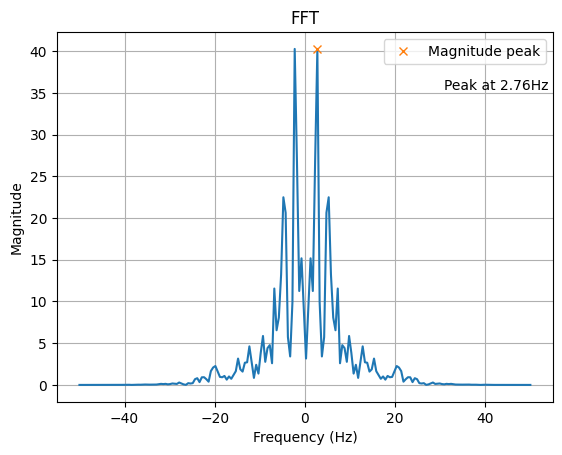

In [326]:
from scipy.fft import fft, fftshift

def find_peak_freq(signal, M, gen_plot = False): # returns peak frequency (positive frequencies)
    w = np.linspace(-np.pi, np.pi, M) # M is the window size

    sig_fft = fft(signal, M)
    sig_fft = fftshift(sig_fft)

    fs = 100 # sampling rate (hz)
    freq = (w * fs) / (2 * np.pi) # rad/sample to hz

    index_max = np.argmax(np.abs(sig_fft[M//2:]))
    value_max = np.abs(sig_fft)[M//2:][index_max]
    freq_max = freq[M//2:][index_max]

    if(gen_plot):
        plt.title('FFT')
        plt.figtext(.73, .76, f'Peak at {"{:.2f}".format(freq_max)}Hz')
        # plt.plot(w, np.abs(sig_fft)) # plot mag in rads
        # plt.xlabel('Frequency (rad/s)')
        plt.plot(freq, np.abs(sig_fft)) # plot mag in hertz
        plt.plot(freq_max, value_max, "x", label='Magnitude peak')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude')
        plt.legend()

    return freq_max

freq_max = find_peak_freq(data[724][1], M, True)


#### Finding signal energy

In [327]:
def find_energy(signal):
    return np.sum(np.abs(signal)**2)

energy = find_energy(data[750][1])
print(energy)

0.44657589085588156


#### Finding mean crossing times

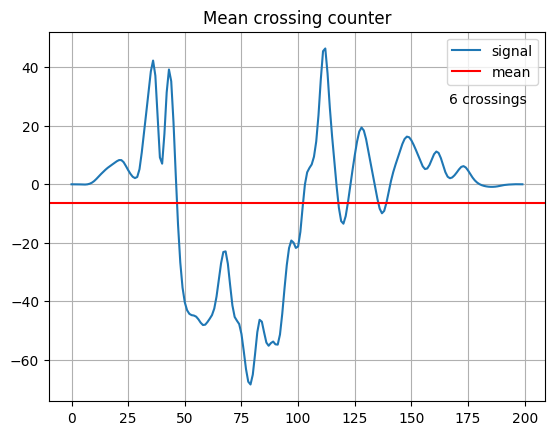

In [328]:
def mean_crossing_count(signal, gen_plot = False):
    mean = np.mean(signal)
    crossings = np.where(np.diff(np.sign(signal - mean)))[0]

    if(gen_plot):
        plt.title('Mean crossing counter')
        plt.plot(signal, label='signal')
        plt.axhline(mean, color='r', label='mean')
        plt.figtext(.75, .73, f'{len(crossings)} crossings')
        plt.legend()

    return len(crossings)

num_crossings = mean_crossing_count(data[19][2], True)

In [329]:
newDogsData = []

for window in data:
    acc_freq_max = find_peak_freq(window[1], M)
    gyr_freq_max = find_peak_freq(window[2], M)
    acc_energy = find_energy(window[1])
    gyr_energy = find_energy(window[2])
    acc_num_crossings = mean_crossing_count(window[1])
    gyr_num_crossings = mean_crossing_count(window[2])

    behavior = window[3][0]
    dog_id = window[0][0]

    newDogsData.append([dog_id, behavior, acc_freq_max, gyr_freq_max, acc_energy, gyr_energy, acc_num_crossings, gyr_num_crossings])

newDogsData = pd.DataFrame(newDogsData, columns=["DogID", "Behavior", "AccFreqMax", "GyrFreqMax", "AccEnergy", "GyrEnergy", "AccNumCross", "GyrNumCross"])
newDogsData

,DogID,Behavior,AccFreqMax,GyrFreqMax,AccEnergy,GyrEnergy,AccNumCross,GyrNumCross
0,16,Walking,3.768844,3.768844,0.945086,68317.887519,14,16
1,16,Walking,2.763819,0.753769,1.021101,71285.027321,16,12
2,16,Walking,6.281407,0.753769,0.931900,174083.395221,16,6
3,16,Walking,3.768844,0.753769,1.225206,51074.024224,16,12
4,16,Walking,3.768844,3.768844,1.113486,57254.312616,12,16
...,...,...,...,...,...,...,...,...
16671,74,Standing,4.271357,1.256281,0.061115,75590.283400,18,2
16672,74,Standing,0.251256,1.256281,0.058707,65433.928200,18,4
16673,74,Standing,4.271357,0.753769,0.065057,24341.267248,14,6
16674,74,Standing,4.271357,1.256281,0.066299,30057.655737,16,4


In [330]:
newDogsData = [dog for x, dog in newDogsData.groupby('DogID', as_index=False)] # Separating each dog in it's own df again

### Decision Tree

In [349]:
def saveTreePlot(clf, i):
    if not os.path.exists('trees'):
        os.makedirs('trees')

    plt.figure(figsize=(60, 12))
    tree.plot_tree(clf, fontsize=12, filled=True)
    plt.savefig(f'./trees/tree{i}.png')
    plt.close()

def normalize(data):
    return data / data.max(axis=0)

clf = tree.DecisionTreeClassifier(max_depth=5, criterion='gini')
f1_scores = []
matrix = np.zeros((3,3))

for i in range(len(newDogsData)): # i is the dog (defined by DogID)
    if i == 0 : start = datetime.now()

    trainData = np.concatenate(newDogsData[:i] + newDogsData[i + 1:])
    testData = newDogsData[i].to_numpy()

    X_train, y_train = normalize(trainData[:, 2:]), trainData[:, 1]
    X_test, y_test = normalize(testData[:, 2:]), testData[:, 1]

    clf.fit(X_train, y_train)

    # saveTreePlot(clf, i) # Optionally save tree plots (needs more time to run)

    y_pred = clf.predict(X_test) # test with the "leaved out dog"

    f1_scores.append(metrics.f1_score(y_test, y_pred, average=None, labels=desired, zero_division=0))

    matrix += metrics.confusion_matrix(y_test, y_pred)

    if i == 0 : print(f'Estimated time: {(datetime.now() - start) * len(newDogsData)}')

Estimated time: 0:00:03.893985


ValueError: Unknown format code 'd' for object of type 'float'

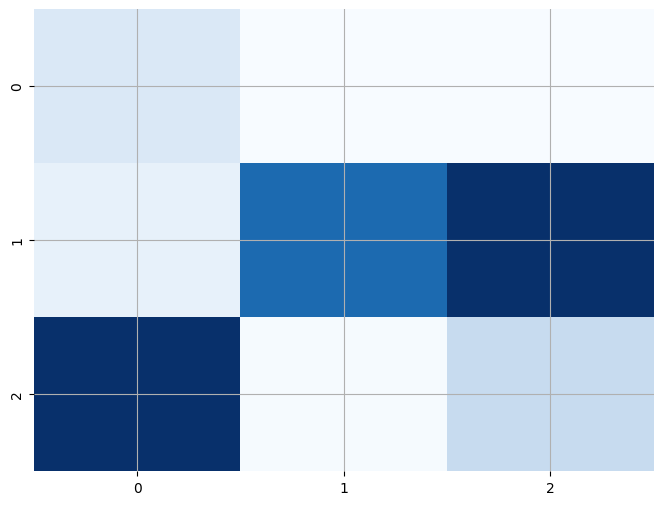

In [352]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Cria o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

([<matplotlib.axis.XTick at 0x1d05e5c3220>,
 [Text(1, 0, 'Galloping'), Text(2, 0, 'Standing'), Text(3, 0, 'Walking')])

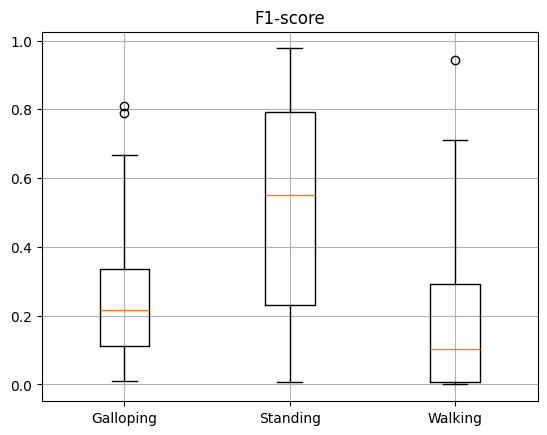

In [332]:
f1 = np.array(f1_scores)

plt.title('F1-score')

plt.boxplot([f1[:, 0][f1[:,0] != 0], 
             f1[:, 1][f1[:,1] != 0], 
             f1[:, 2][f1[:,1] != 0]])

plt.xticks([1, 2, 3], desired)

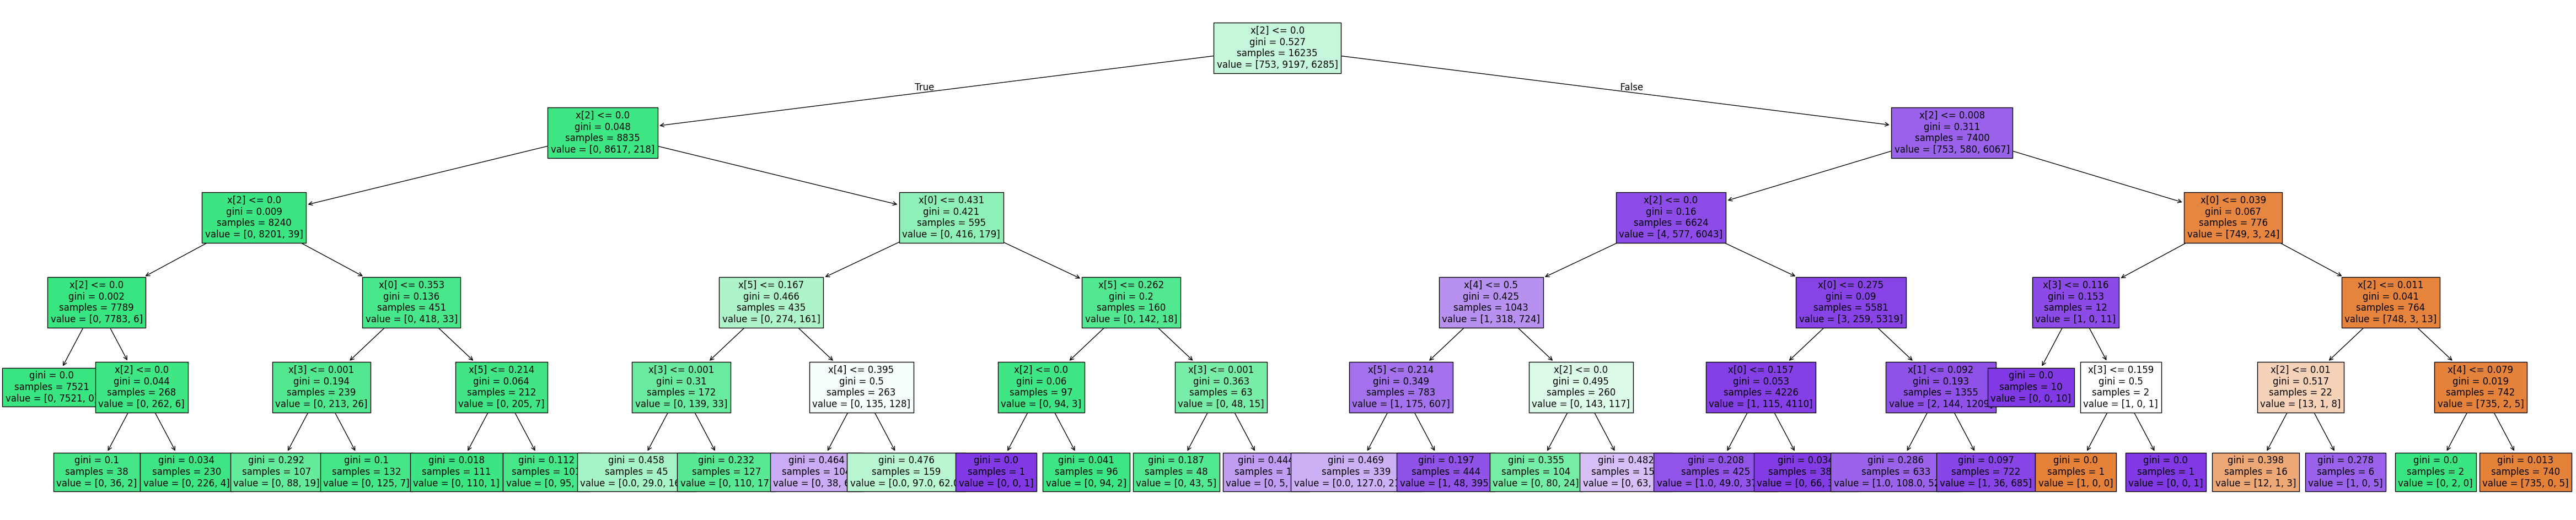

In [333]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

plt.figure(figsize=(60, 12))
tree.plot_tree(clf, fontsize=12, filled=True)
plt.show()